In [1]:
import SKEDTools
import os

In [2]:
# Remove files
codes=["u23168a","M21303S"]
extensions = ["a.skd","o.skd","_iwata.DRG","_iwataa.skd","_iwatao.skd"]
for code in codes:
    for extension in extensions:
        path=f"{code}{extension}"
        if(os.path.exists(path)):
            os.remove(path)

In [3]:
# Read and output
drg = SKEDTools.DRG()
code="u23168a"
#code="M21303S"
#
drg.read(f'{code}.DRG')
drg.output()

$EXPER U23168A
*P.I.: KF
*Correlator: GICO3
*
$PARAM
SYNCHRONIZE OFF
$SOURCES
3C345    $        16 42 58.80990 +39 48 36.9930 2000.0  0  0  0  0
SN2023IX $        14 03 38.56200 +54 18 41.9400 2000.0  0  0  0  0
J1359+55 $        13 59 05.74340 +55 44 29.3830 2000.0  0  0  0  0
*
$STATIONS
* ANTENNA INFORMATION
A  K YAMAGU32 AZEL   0.00   15.0    0.0    2.0  358.0   15.0    0.0    5.0   85.0   32.0 Y1 Y1
A  L YAMAGU34 AZEL   0.00   15.0    0.0    2.0  358.0   15.0    0.0    5.0   85.0   34.0 Y2 Y2
A  H HITACHI  AZEL   0.00   10.0    0.0    2.0  358.0   10.0    0.0    5.0   85.0   32.0 HI HI
* STATION POSITION INFORMATION
P Y1 YAMAGU32 -3502544.2588  3950966.3969  3566381.1649 00000000
P Y2 YAMAGU34 -3502567.5760  3950885.7340  3566449.1150 00000000
P HI HITACHI -3961788.9740  3243597.4920  3790597.6920 00000000
*
$SKED
*SOURCES CAL FR          START     DUR       IDLE       STATIONS  TAPE
3C345     10 S2  PREOB 23168073900  600  MIDOB 0 POSTOB L-H- 1F00000 1F00000 YNNN
J1359+55  10 S2 

In [4]:
# Check Az, El limit and slew speed
drg.check()

OK


In [5]:
# Write a new file
drg.write(f'{code}_iwata.DRG')

In [6]:
# Make .skd files using "drgconv2020.out"
import os
com=f"./drgconv2020.out {code}"
os.system(com)
com=f"./drgconv2020.out {code}_iwata"
os.system(com)

end
end


SOURCES
SKD
SOURCES
SKD


0

In [7]:
# Compare a.skd files using "diff" command
com=f"diff -y --suppress-common-lines {code}a.skd {code}_iwataa.skd"
os.system(com)

3C345    $        16 42 58.8099  +39 48 36.993  2000.0  0  0  |	3C345    $        16 42 58.80990 +39 48 36.9930 2000.0  0  0 
SN2023IX $        14 03 38.5620  +54 18 41.940  2000.0  0  0  |	SN2023IX $        14 03 38.56200 +54 18 41.9400 2000.0  0  0 
J1359+55 $        13 59 05.7434  +55 44 29.383  2000.0  0  0  |	J1359+55 $        13 59 05.74340 +55 44 29.3830 2000.0  0  0 


256

In [8]:
# Compare a.skd files
com=f"diff -y --suppress-common-lines {code}o.skd {code}_iwatao.skd"
os.system(com)

3C345    $        16 42 58.8099  +39 48 36.993  2000.0  0  0  |	3C345    $        16 42 58.80990 +39 48 36.9930 2000.0  0  0 
SN2023IX $        14 03 38.5620  +54 18 41.940  2000.0  0  0  |	SN2023IX $        14 03 38.56200 +54 18 41.9400 2000.0  0  0 
J1359+55 $        13 59 05.7434  +55 44 29.383  2000.0  0  0  |	J1359+55 $        13 59 05.74340 +55 44 29.3830 2000.0  0  0 


256

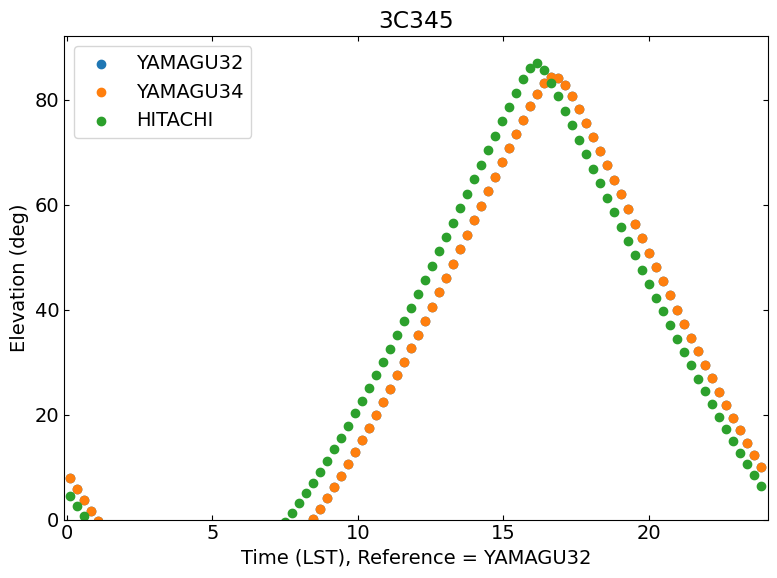

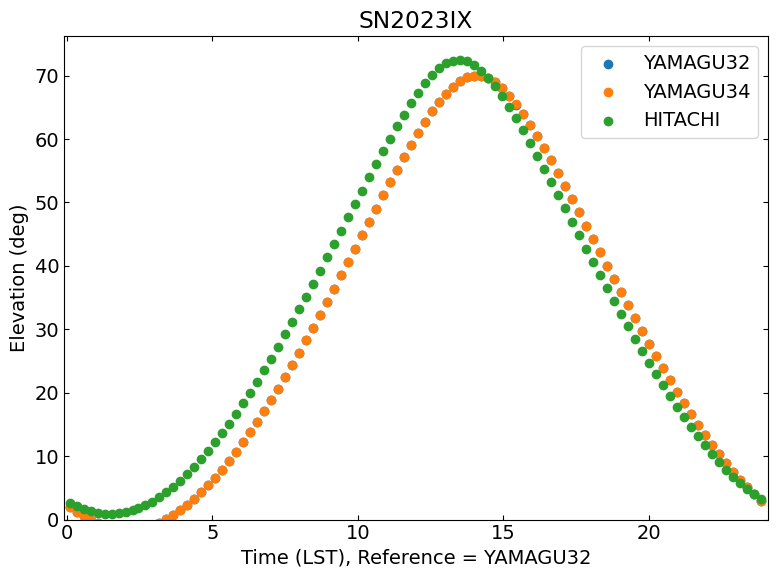

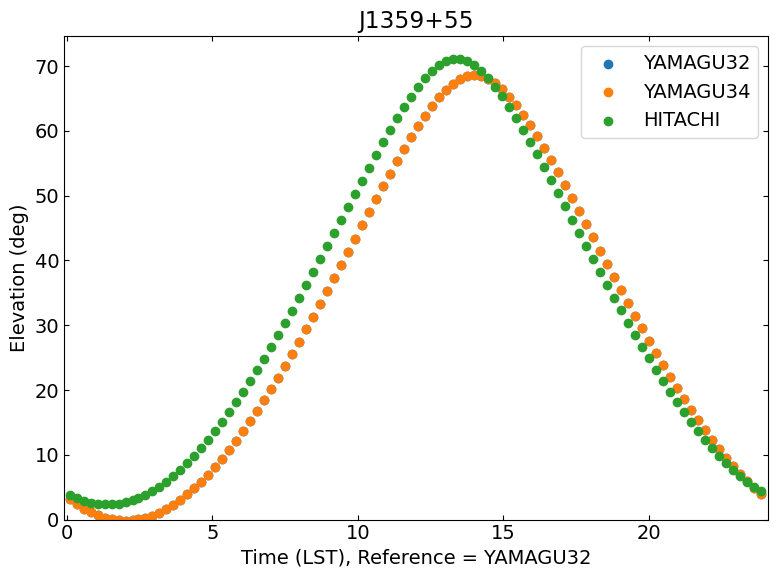

In [9]:
# Plot El angle
drg.el_plot(srcnames = ["3C345","SN2023IX","J1359+55"],timezone="lst")

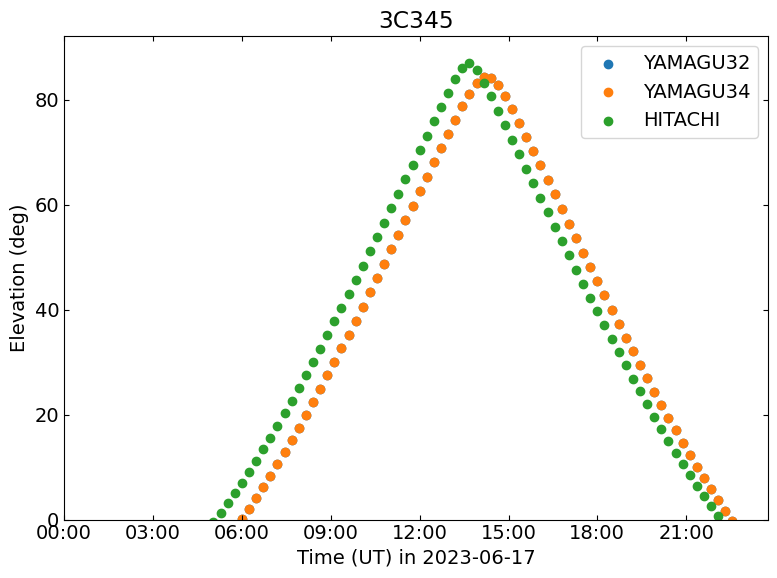

In [10]:
drg.el_plot(srcnames = ["3C345"],timezone="ut")

In [11]:
# Shift time in the schedule file
from astropy.time import TimeDelta
import astropy.units as u
import copy

orgdrg1 = copy.deepcopy(drg)
orgdrg2 = copy.deepcopy(drg)

print("original schedule")
lines = drg.sked.output()
for line in lines:
    print(line)

print("shift 1 day") 
orgdrg1.shift(TimeDelta(1.*u.day))
lines = orgdrg1.sked.output()
for line in lines:
    print(line)

print("shift 1 day with the same LST range") 
orgdrg2.dayshift(1)
lines = orgdrg2.sked.output()
for line in lines:
    print(line)


original schedule
$SKED
*SOURCES CAL FR          START     DUR       IDLE       STATIONS  TAPE
3C345     10 S2  PREOB 23168073900  600  MIDOB 0 POSTOB L-H- 1F00000 1F00000 YNNN
J1359+55  10 S2  PREOB 23168075400  240  MIDOB 0 POSTOB L-H- 1F00000 1F00000 YNNN
SN2023IX  10 S2  PREOB 23168075900  540  MIDOB 0 POSTOB L-H- 1F00000 1F00000 YNNN
J1359+55  10 S2  PREOB 23168080900  240  MIDOB 0 POSTOB L-H- 1F00000 1F00000 YNNN
SN2023IX  10 S2  PREOB 23168081400  540  MIDOB 0 POSTOB L-H- 1F00000 1F00000 YNNN
J1359+55  10 S2  PREOB 23168082400  240  MIDOB 0 POSTOB L-H- 1F00000 1F00000 YNNN
SN2023IX  10 S2  PREOB 23168082900  540  MIDOB 0 POSTOB L-H- 1F00000 1F00000 YNNN
J1359+55  10 S2  PREOB 23168083900  240  MIDOB 0 POSTOB L-H- 1F00000 1F00000 YNNN
*
shift 1 day
$SKED
*SOURCES CAL FR          START     DUR       IDLE       STATIONS  TAPE
3C345     10 S2  PREOB 23169073900  600  MIDOB 0 POSTOB L-H- 1F00000 1F00000 YNNN
J1359+55  10 S2  PREOB 23169075400  240  MIDOB 0 POSTOB L-H- 1F00000 1F00000

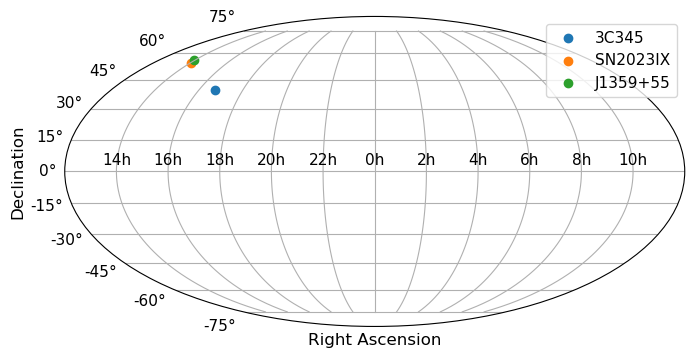

In [12]:
drg.sourceplot()

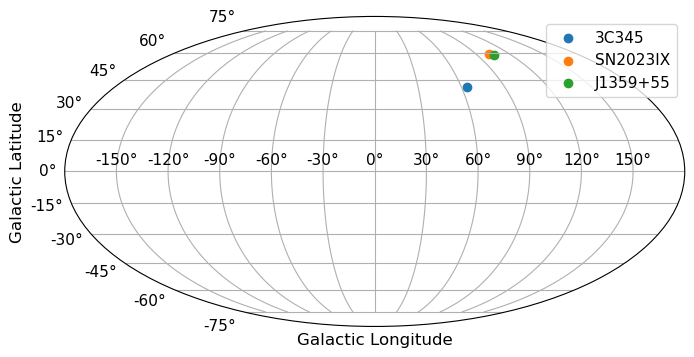

In [13]:
drg.sourceplot(coord="Galactic")

In [14]:
from astropy.coordinates import SkyCoord
from astropy.time import Time,TimeDelta
import astropy.units as u

exper = SKEDTools.SKD_Exper(obscode="testskd",name="Iwata",correlator="gico3")

stations = SKEDTools.SKD_Station()
antcodes=["L","H"]
stations.inputcodes(antcodes)

sources = SKEDTools.SKD_Source()
names=["3C345","SN2023IXF","J1359+55"]
coords=["16h42m58.80990s +39d48m36.9930s","14h03m38.56200s +54d18m41.9400s","13h59m05.74340s +55d44m29.3830s"]
cs=SkyCoord(coords)
for name,c in zip(names,cs):
    source=SKEDTools.Source(name,c)
    sources.add(source)

skeds = SKEDTools.SKD_Sked()
name="3C345"
time = Time("2023:168:07:39:00")
dur=TimeDelta(600*u.second)
sked = SKEDTools.Sked(name,time,dur,antcodes)
skeds.add(sked)

In [15]:
drg=SKEDTools.DRG()
drg.add(exper,stations,sources,skeds)

In [16]:
drg.output()

$EXPER testskd
*P.I.: Iwata
*Correlator: gico3
*
$PARAM
SYNCHRONIZE OFF
$SOURCES
3C345    $        16 42 58.80990 +39 48 36.9930 2000.0  0  0  0  0
SN2023IX $        14 03 38.56200 +54 18 41.9400 2000.0  0  0  0  0
J1359+55 $        13 59 05.74340 +55 44 29.3830 2000.0  0  0  0  0
*
$STATIONS
* ANTENNA INFORMATION
A  L YAMAGU34 AZEL   0.00   15.0    0.0    2.0  358.0   15.0    0.0    5.0   85.0   34.0 Y2 Y2
A  H HITACHI  AZEL   0.00   10.0    0.0    2.0  358.0   10.0    0.0    5.0   85.0   32.0 HI HI
* STATION POSITION INFORMATION
P Y2 YAMAGU34 -3502567.5760  3950885.7340  3566449.1150 00000000
P HI HITACHI -3961788.9740  3243597.4920  3790597.6920 00000000
*
$SKED
*SOURCES CAL FR          START     DUR       IDLE       STATIONS  TAPE
3C345     10 S2  PREOB 23168073900  600  MIDOB 0 POSTOB L-H- 1F00000 1F00000 YNNN
*
$HEAD
*
$CODES
*
